In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Woody\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Woody\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [3]:
from keras import models
from keras import layers

#원래 네트워크
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
#더 작은 네트워크
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 20s 353ms/step - loss: 0.5408 - acc: 0.7617 - val_loss: 0.3342 - val_acc: 0.8803
Epoch 2/20
49/49 [==============================] - 2s 50ms/step - loss: 0.2667 - acc: 0.9113 - val_loss: 0.2966 - val_acc: 0.8804
Epoch 3/20
49/49 [==============================] - 2s 47ms/step - loss: 0.1971 - acc: 0.9315 - val_loss: 0.2847 - val_acc: 0.8868
Epoch 4/20
49/49 [==============================] - 3s 55ms/step - loss: 0.1657 - acc: 0.9427 - val_loss: 0.3116 - val_acc: 0.8770
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 0.1417 - acc: 0.9517 - val_loss: 0.3224 - val_acc: 0.8769
Epoch 6/20
49/49 [==============================] - 2s 44ms/step - loss: 0.1217 - acc: 0.9599 - val_loss: 0.3369 - val_acc: 0.8756
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1043 - acc: 0.9664 - val_loss: 0.3596 - val_acc: 0.8721
Epoch 8/20
49/49 [==============================] - 2s 45ms/step - loss: 0.0965 -

In [6]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 18s 321ms/step - loss: 0.6145 - acc: 0.6543 - val_loss: 0.4059 - val_acc: 0.8701
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3418 - acc: 0.8995 - val_loss: 0.3158 - val_acc: 0.8848
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2484 - acc: 0.9188 - val_loss: 0.2870 - val_acc: 0.8881
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1928 - acc: 0.9365 - val_loss: 0.2830 - val_acc: 0.8868
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1719 - acc: 0.9416 - val_loss: 0.2864 - val_acc: 0.8867
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1463 - acc: 0.9513 - val_loss: 0.3002 - val_acc: 0.8822
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.1358 - acc: 0.9550 - val_loss: 0.3129 - val_acc: 0.8808
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1121 -

In [7]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

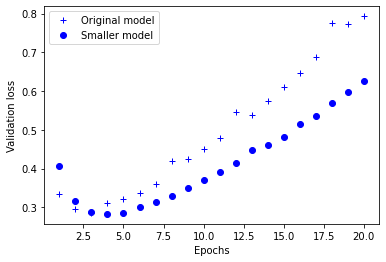

In [8]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()
# original model은 더 빨리 적응했다가 과대적합으로 더 빨리 감
# smaller model 은 더 천천히 적응행다가 과대적합으로 더 나중에 감

In [9]:
#훨씬 많은 네트워크
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 43s 830ms/step - loss: 0.7172 - acc: 0.7085 - val_loss: 0.3393 - val_acc: 0.8566
Epoch 2/20
49/49 [==============================] - 29s 604ms/step - loss: 0.2235 - acc: 0.9145 - val_loss: 0.3487 - val_acc: 0.8521
Epoch 3/20
49/49 [==============================] - 29s 604ms/step - loss: 0.1286 - acc: 0.9526 - val_loss: 0.3625 - val_acc: 0.8811
Epoch 4/20
49/49 [==============================] - 30s 616ms/step - loss: 0.0617 - acc: 0.9874 - val_loss: 0.4379 - val_acc: 0.8805
Epoch 5/20
49/49 [==============================] - 30s 618ms/step - loss: 0.0208 - acc: 0.9967 - val_loss: 0.4210 - val_acc: 0.8822
Epoch 6/20
49/49 [==============================] - 32s 658ms/step - loss: 0.0018 - acc: 0.9998 - val_loss: 0.6607 - val_acc: 0.8815
Epoch 7/20
49/49 [==============================] - 33s 676ms/step - loss: 9.3875e-05 - acc: 1.0000 - val_loss: 0.8410 - val_acc: 0.8824
Epoch 8/20
49/49 [==============================] - 33s 673ms/ste

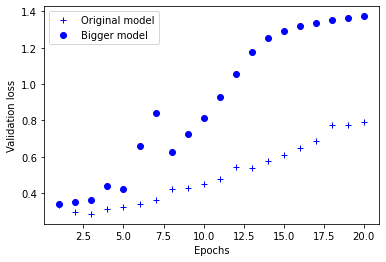

In [11]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

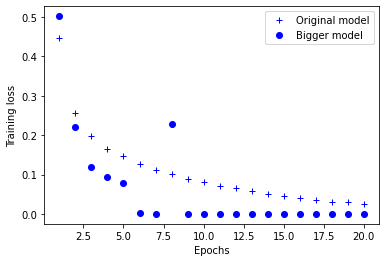

In [12]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [13]:
# L2규제 패널티 방법
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 33s 636ms/step - loss: 0.6169 - acc: 0.7385 - val_loss: 0.4135 - val_acc: 0.8766
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3607 - acc: 0.8955 - val_loss: 0.3412 - val_acc: 0.8876
Epoch 3/20
49/49 [==============================] - 1s 31ms/step - loss: 0.2864 - acc: 0.9194 - val_loss: 0.3389 - val_acc: 0.8818
Epoch 4/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2532 - acc: 0.9302 - val_loss: 0.3609 - val_acc: 0.8709
Epoch 5/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2359 - acc: 0.9382 - val_loss: 0.3346 - val_acc: 0.8850
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2267 - acc: 0.9403 - val_loss: 0.3423 - val_acc: 0.8833
Epoch 7/20
49/49 [==============================] - 2s 36ms/step - loss: 0.2191 - acc: 0.9421 - val_loss: 0.3883 - val_acc: 0.8662
Epoch 8/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2160 -

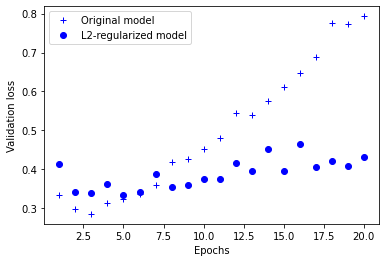

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
# L1 규제 패널티 방법
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [18]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 21s 243ms/step - loss: 0.6864 - acc: 0.7299 - val_loss: 0.4540 - val_acc: 0.8578
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3993 - acc: 0.8872 - val_loss: 0.3739 - val_acc: 0.8878
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3431 - acc: 0.9031 - val_loss: 0.3605 - val_acc: 0.8885
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.3170 - acc: 0.9102 - val_loss: 0.3568 - val_acc: 0.8885
Epoch 5/20
49/49 [==============================] - 1s 31ms/step - loss: 0.3035 - acc: 0.9159 - val_loss: 0.3581 - val_acc: 0.8864
Epoch 6/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2919 - acc: 0.9227 - val_loss: 0.3593 - val_acc: 0.8867
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2864 - acc: 0.9234 - val_loss: 0.3944 - val_acc: 0.8736
Epoch 8/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2829 -

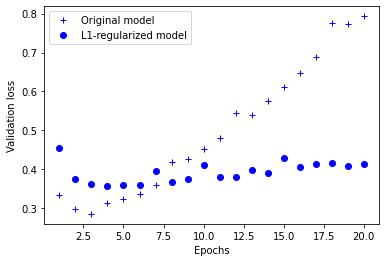

In [19]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [20]:
# L1, L2 비교
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [21]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 22s 381ms/step - loss: 0.6932 - acc: 0.7355 - val_loss: 0.4443 - val_acc: 0.8761
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.3972 - acc: 0.8942 - val_loss: 0.4011 - val_acc: 0.8713
Epoch 3/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3453 - acc: 0.9012 - val_loss: 0.3761 - val_acc: 0.8787
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3209 - acc: 0.9099 - val_loss: 0.3819 - val_acc: 0.8766
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.3097 - acc: 0.9155 - val_loss: 0.3612 - val_acc: 0.8866
Epoch 6/20
49/49 [==============================] - 2s 42ms/step - loss: 0.2985 - acc: 0.9220 - val_loss: 0.3634 - val_acc: 0.8865
Epoch 7/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2944 - acc: 0.9212 - val_loss: 0.3664 - val_acc: 0.8833
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2867 -

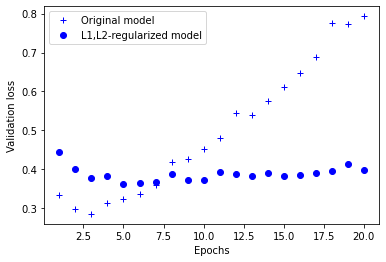

In [22]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [24]:
#드롭아웃

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [25]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 21s 383ms/step - loss: 0.6365 - acc: 0.6270 - val_loss: 0.4446 - val_acc: 0.8669
Epoch 2/20
49/49 [==============================] - 2s 42ms/step - loss: 0.4682 - acc: 0.7863 - val_loss: 0.3462 - val_acc: 0.8817
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.3753 - acc: 0.8568 - val_loss: 0.2965 - val_acc: 0.8889
Epoch 4/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3157 - acc: 0.8857 - val_loss: 0.2818 - val_acc: 0.8898
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2837 - acc: 0.9060 - val_loss: 0.2813 - val_acc: 0.8898
Epoch 6/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2458 - acc: 0.9221 - val_loss: 0.2908 - val_acc: 0.8894
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2222 - acc: 0.9279 - val_loss: 0.3045 - val_acc: 0.8876
Epoch 8/20
49/49 [==============================] - 2s 44ms/step - loss: 0.2072 -

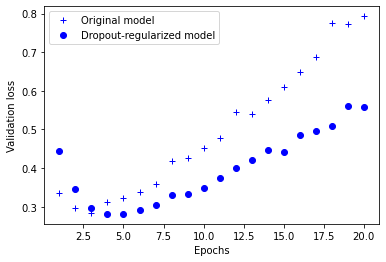

In [26]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()